# DALL-E - Generating Images from Text

* [DALLE-pytorch](https://github.com/lucidrains/DALLE-pytorch)

In [1]:
COLAB = True

In [2]:
# --- Remember to change the runtime to use GPU for better performance
if COLAB:
    !nvidia-smi
  
!pip install -Uqq dalle-pytorch

Fri Mar 26 15:26:54 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from pathlib import Path
from tqdm import tqdm
import torch
from einops import repeat
from PIL import Image
from torchvision.utils import make_grid, save_image
from dalle_pytorch import DiscreteVAE, OpenAIDiscreteVAE, VQGanVAE1024, DALLE
from dalle_pytorch.simple_tokenizer import tokenize, tokenizer, VOCAB_SIZE

In [4]:
vae = OpenAIDiscreteVAE()

In [25]:
dalle = DALLE(vae = vae, dim=1024, depth=32).cuda()

In [26]:
image_text = "fireflies in a field under a full moon"
batch_size = 4
output_dir = "/content/"
num_images = 1
top_k = 0.9

In [27]:
image_size = vae.image_size
text = tokenize([image_text], dalle.text_seq_len).cuda()
text = repeat(text, '() n -> b n', b = num_images)
outputs = []
for text_chunk in tqdm(text.split(batch_size), desc = 'generating images'):
    output = dalle.generate_images(text_chunk, filter_thres = top_k)
    outputs.append(output)

outputs = torch.cat(outputs)

generating images: 100%|██████████| 1/1 [09:08<00:00, 548.27s/it]


In [28]:
outputs_dir = Path(output_dir) / image_text.replace(' ', '_')
outputs_dir.mkdir(parents = True, exist_ok = True)

for i, image in tqdm(enumerate(outputs), desc = 'saving images'):
    save_image(image, outputs_dir / f'{i}.jpg')

print(f'created {num_images} images at "{str(outputs_dir)}"')

saving images: 1it [00:00, 118.61it/s]

created 1 images at "/content/fireflies_in_a_field_under_a_full_moon"


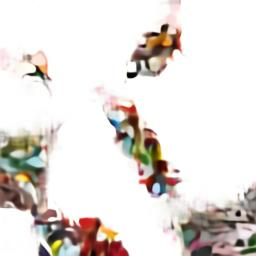

In [29]:
import glob
from IPython.display import Image 

images = glob.glob("/content/*/*.jpg")
for image in images:
   img = Image(filename=image)
   display(img)